### Importando Bibliotecas necessárias

In [1]:
import pandas as pd

### Carregando os dados

In [2]:
url = 'https://caelum-online-public.s3.amazonaws.com/2928-transformacao-manipulacao-dados/moveis_disponiveis.json'
url2 = 'https://caelum-online-public.s3.amazonaws.com/2928-transformacao-manipulacao-dados/dados_hospedagem.json'


data_imoveis = pd.read_json(url)
data_hosp = pd.read_json(url2)

In [4]:
data_hosp.head()

,info_moveis
0,"{'avaliacao_geral': '10.0', 'experiencia_local..."
1,"{'avaliacao_geral': '10.0', 'experiencia_local..."
2,"{'avaliacao_geral': '10.0', 'experiencia_local..."
3,"{'avaliacao_geral': '10.0', 'experiencia_local..."
4,"{'avaliacao_geral': '10.0', 'experiencia_local..."


### Normalizando o dataframe

In [3]:
# Dados estão aninhados em dicionarios, para converter em tabela, basta: 
dados = pd.json_normalize(data_hosp['info_moveis'])
dados.head()

,avaliacao_geral,experiencia_local,max_hospedes,descricao_local,descricao_vizinhanca,quantidade_banheiros,quantidade_quartos,quantidade_camas,modelo_cama,comodidades,taxa_deposito,taxa_limpeza,preco
0,10.0,--,1,[This clean and comfortable one bedroom sits r...,[Lower Queen Anne is near the Seattle Center (...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Real Bed, Futon, Futon, Pull-out Sofa, Real B...","[{Internet,""Wireless Internet"",Kitchen,""Free P...","[$0, $0, $0, $0, $0, $350.00, $350.00, $350.00...","[$0, $0, $0, $20.00, $15.00, $28.00, $35.00, $...","[$110.00, $45.00, $55.00, $52.00, $85.00, $50...."
1,10.0,--,10,[Welcome to the heart of the 'Ballard Brewery ...,"[--, Capital Hill is the heart of Seattle, bor...","[2, 3, 2, 3, 3, 3, 2, 1, 2, 2, 2]","[3, 4, 2, 3, 3, 3, 3, 3, 3, 4, 3]","[5, 6, 8, 3, 3, 5, 4, 5, 6, 7, 4]","[Real Bed, Real Bed, Real Bed, Real Bed, Real ...","[{TV,Internet,""Wireless Internet"",Kitchen,""Fre...","[$500.00, $300.00, $0, $300.00, $300.00, $360....","[$125.00, $100.00, $85.00, $110.00, $110.00, $...","[$350.00, $300.00, $425.00, $300.00, $285.00, ..."
2,10.0,--,11,[New modern house built in 2013. Spectacular ...,[Upper Queen Anne is a charming neighborhood f...,[4],[5],[7],[Real Bed],"[{TV,""Cable TV"",Internet,""Wireless Internet"",""...","[$1,000.00]",[$300.00],[$975.00]
3,10.0,--,12,[Our NW style home is 3200+ sq ft with 3 level...,[The Views from our top floor! Wallingford ha...,"[3, 3, 3, 3, 3, 3, 3, 3]","[6, 6, 5, 5, 5, 5, 4, 4]","[6, 6, 7, 8, 7, 7, 6, 6]","[Real Bed, Real Bed, Real Bed, Real Bed, Real ...","[{Internet,""Wireless Internet"",Kitchen,""Free P...","[$500.00, $500.00, $500.00, $500.00, $500.00, ...","[$225.00, $300.00, $250.00, $250.00, $250.00, ...","[$490.00, $550.00, $350.00, $350.00, $350.00, ..."
4,10.0,--,14,"[Perfect for groups. 2 bedrooms, full bathroom...",[Safeway grocery store within walking distance...,"[2, 3]","[2, 6]","[3, 9]","[Real Bed, Real Bed]","[{TV,Internet,""Wireless Internet"",Kitchen,""Fre...","[$300.00, $2,000.00]","[$40.00, $150.00]","[$200.00, $545.00]"


In [5]:
dados.shape

(70, 13)

In [6]:
#Melhorar a visualização
colunas = list(dados.columns)
colunas

['avaliacao_geral',
 'experiencia_local',
 'max_hospedes',
 'descricao_local',
 'descricao_vizinhanca',
 'quantidade_banheiros',
 'quantidade_quartos',
 'quantidade_camas',
 'modelo_cama',
 'comodidades',
 'taxa_deposito',
 'taxa_limpeza',
 'preco']

Ao aplicar a função "explode" a essas colunas, cada valor da lista será colocado em uma nova linha, mantendo os valores correspondentes das outras colunas. Isso resultará em mais linhas no dataframe, onde as outras colunas são replicadas para cada valor da lista.

In [8]:
dados = dados.explode(colunas[3:])
dados.head()

,avaliacao_geral,experiencia_local,max_hospedes,descricao_local,descricao_vizinhanca,quantidade_banheiros,quantidade_quartos,quantidade_camas,modelo_cama,comodidades,taxa_deposito,taxa_limpeza,preco
0,10.0,--,1,This clean and comfortable one bedroom sits ri...,Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$0,$110.00
0,10.0,--,1,Our century old Upper Queen Anne house is loca...,"Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$45.00
0,10.0,--,1,Cozy room in two-bedroom apartment along the l...,The convenience of being in Seattle but on the...,1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$55.00
0,10.0,--,1,Very lovely and cozy room for one. Convenientl...,"Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$20.00,$52.00
0,10.0,--,1,The “Studio at Mibbett Hollow' is in a Beautif...,--,1,1,1,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",$0,$15.00,$85.00


In [9]:
dados.shape

(3818, 13)

In [11]:
#Resetando os valores do index
dados.reset_index(inplace=True, drop=True)

dados.head()

,avaliacao_geral,experiencia_local,max_hospedes,descricao_local,descricao_vizinhanca,quantidade_banheiros,quantidade_quartos,quantidade_camas,modelo_cama,comodidades,taxa_deposito,taxa_limpeza,preco
0,10.0,--,1,This clean and comfortable one bedroom sits ri...,Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$0,$110.00
1,10.0,--,1,Our century old Upper Queen Anne house is loca...,"Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$45.00
2,10.0,--,1,Cozy room in two-bedroom apartment along the l...,The convenience of being in Seattle but on the...,1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$55.00
3,10.0,--,1,Very lovely and cozy room for one. Convenientl...,"Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$20.00,$52.00
4,10.0,--,1,The “Studio at Mibbett Hollow' is in a Beautif...,--,1,1,1,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",$0,$15.00,$85.00


### Convertendo os tipos de dados do dataframe

Converter os tipos de dados em um dataframe é essencial para garantir a integridade dos dados e otimizar a eficiência de armazenamento e processamento, facilitando análises e visualizações corretas.

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   avaliacao_geral       3818 non-null   object
 1   experiencia_local     3818 non-null   object
 2   max_hospedes          3818 non-null   object
 3   descricao_local       3818 non-null   object
 4   descricao_vizinhanca  3818 non-null   object
 5   quantidade_banheiros  3818 non-null   object
 6   quantidade_quartos    3818 non-null   object
 7   quantidade_camas      3818 non-null   object
 8   modelo_cama           3818 non-null   object
 9   comodidades           3818 non-null   object
 10  taxa_deposito         3818 non-null   object
 11  taxa_limpeza          3818 non-null   object
 12  preco                 3818 non-null   object
dtypes: object(13)
memory usage: 387.9+ KB


### Manipulação de dados númericos

In [12]:
#Importando a biblioteca numpy para aplicar a função para converter os dados
import numpy as np
dados.max_hospedes = dados.max_hospedes.astype(np.int64)

In [13]:
#Colunas para o  tipo inteiro
colunas_num = ['quantidade_banheiros','quantidade_quartos','quantidade_camas']
dados[colunas_num] = dados[colunas_num].astype(np.int64)

In [14]:
#Coluna para o tipo float
dados['avaliacao_geral'] = dados['avaliacao_geral'].astype(np.float64)

In [15]:
#Verificando se os dados foram convertidos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avaliacao_geral       3162 non-null   float64
 1   experiencia_local     3818 non-null   object 
 2   max_hospedes          3818 non-null   int64  
 3   descricao_local       3818 non-null   object 
 4   descricao_vizinhanca  3818 non-null   object 
 5   quantidade_banheiros  3818 non-null   int64  
 6   quantidade_quartos    3818 non-null   int64  
 7   quantidade_camas      3818 non-null   int64  
 8   modelo_cama           3818 non-null   object 
 9   comodidades           3818 non-null   object 
 10  taxa_deposito         3818 non-null   object 
 11  taxa_limpeza          3818 non-null   object 
 12  preco                 3818 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 387.9+ KB


Antes de converter o tipo da coluna preço, é preciso fazer uns ajustes primeiro (remover os caracteres especiais e substituir virgula por ponto)

In [16]:
# Tratamento da coluna Preço
dados.preco = dados.preco.apply(lambda x:x.replace('$','').replace(',','').strip())

In [17]:
# Convertendo tipo de dados
dados.preco = dados.preco.astype(np.float64)

In [19]:
#Verificando se os dados foram convertidos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avaliacao_geral       3162 non-null   float64
 1   experiencia_local     3818 non-null   object 
 2   max_hospedes          3818 non-null   int64  
 3   descricao_local       3818 non-null   object 
 4   descricao_vizinhanca  3818 non-null   object 
 5   quantidade_banheiros  3818 non-null   int64  
 6   quantidade_quartos    3818 non-null   int64  
 7   quantidade_camas      3818 non-null   int64  
 8   modelo_cama           3818 non-null   object 
 9   comodidades           3818 non-null   object 
 10  taxa_deposito         3818 non-null   object 
 11  taxa_limpeza          3818 non-null   object 
 12  preco                 3818 non-null   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 387.9+ KB


In [21]:
# Tratamento as colunas Taxa_deposito e Taxa limpeza

dados[['taxa_deposito','taxa_limpeza']] = dados[['taxa_deposito','taxa_limpeza']].applymap(lambda x:x.replace('$','').replace(',','').strip())

In [22]:
# Convertendo os dados
dados[['taxa_deposito','taxa_limpeza']] = dados[['taxa_deposito','taxa_limpeza']].astype(np.float64)

In [23]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avaliacao_geral       3162 non-null   float64
 1   experiencia_local     3818 non-null   object 
 2   max_hospedes          3818 non-null   int64  
 3   descricao_local       3818 non-null   object 
 4   descricao_vizinhanca  3818 non-null   object 
 5   quantidade_banheiros  3818 non-null   int64  
 6   quantidade_quartos    3818 non-null   int64  
 7   quantidade_camas      3818 non-null   int64  
 8   modelo_cama           3818 non-null   object 
 9   comodidades           3818 non-null   object 
 10  taxa_deposito         3818 non-null   float64
 11  taxa_limpeza          3818 non-null   float64
 12  preco                 3818 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 387.9+ KB


### Manipulação de Dados Textuais

In [25]:
#Manipulando dados textuais

### função lower() transforma todos os caracteres em letra minuscula
dados.descricao_local = dados.descricao_local.str.lower()

In [26]:
#Removendo caracteres com regex
dados.descricao_local[2343]

"my home is in hillman city, columbia city's cooler cousin to the south.  bars and restaurants a short walk away. easy access to the airport and city center by rail or bus. this neighborhood is a great way to see the real, less touristy seattle.  this is a private room with an adjacent bath.  it's a really light and airy basement with high ceilings -  and very cool when the weather is hot. please be aware that access to this room is down a steep (but very stable) staircase.  if you have trouble negotiating stairs, this probably isn't the right place for you. guests will have access to their room and bath of course, a great sitting area in the backyard/garden and use of kitchen to store food.  i do ask that guests not cook in the kitchen. i'll be coming and going during your stay - glad for a chat here and there and also glad to leave you to your privacy. hillman city is in zip code 98118 - according to npr, the most diverse zip code in the county.  people here are from all over the wor

In [27]:
dados.descricao_local = dados.descricao_local.str.replace('[^a-zA-Z-0-9\-\']',' ',regex=True)

In [28]:
dados.descricao_local = dados.descricao_local.str.replace('(?<!\w)-(?!\w)',' ',regex=True)

In [30]:
dados.head()

,avaliacao_geral,experiencia_local,max_hospedes,descricao_local,descricao_vizinhanca,quantidade_banheiros,quantidade_quartos,quantidade_camas,modelo_cama,comodidades,taxa_deposito,taxa_limpeza,preco
0,10.0,--,1,"[this, clean, and, comfortable, one, bedroom, ...",Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",0.0,0.0,110.0
1,10.0,--,1,"[our, century, old, upper, queen, anne, house,...","Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",0.0,0.0,45.0
2,10.0,--,1,"[cozy, room, in, two-bedroom, apartment, along...",The convenience of being in Seattle but on the...,1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",0.0,0.0,55.0
3,10.0,--,1,"[very, lovely, and, cozy, room, for, one, conv...","Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",0.0,20.0,52.0
4,10.0,--,1,"[the, studio, at, mibbett, hollow', is, in, a,...",--,1,1,1,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",0.0,15.0,85.0


In [25]:
# Tratar a coluna comonidades
### Remover os {}
dados.comodidades = dados.comodidades.str.replace('\{|}|\"','',regex=True)

In [26]:
# função .split() divide uma string em várias partes com base em um delimitador específico.
dados.comodidades = dados.comodidades.str.split(',')

dados.head()

,avaliacao_geral,experiencia_local,max_hospedes,descricao_local,descricao_vizinhanca,quantidade_banheiros,quantidade_quartos,quantidade_camas,modelo_cama,comodidades,taxa_deposito,taxa_limpeza,preco
0,10.0,--,1,"[this, clean, and, comfortable, one, bedroom, ...",Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"[Internet, Wireless Internet, Kitchen, Free Pa...",0.0,0.0,110.0
1,10.0,--,1,"[our, century, old, upper, queen, anne, house,...","Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"[TV, Internet, Wireless Internet, Kitchen, Fre...",0.0,0.0,45.0
2,10.0,--,1,"[cozy, room, in, two-bedroom, apartment, along...",The convenience of being in Seattle but on the...,1,1,1,Futon,"[TV, Internet, Wireless Internet, Kitchen, Fre...",0.0,0.0,55.0
3,10.0,--,1,"[very, lovely, and, cozy, room, for, one, conv...","Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"[Internet, Wireless Internet, Kitchen, Free Pa...",0.0,20.0,52.0
4,10.0,--,1,"[the, studio, at, mibbett, hollow', is, in, a,...",--,1,1,1,Real Bed,"[Wireless Internet, Kitchen, Free Parking on P...",0.0,15.0,85.0


Quando nenhum delimitador específico é definido na função "split", o comportamento padrão é dividir a string com base em qualquer espaço em branco (espaço, tabulação, quebra de linha etc.)

In [33]:
# Transformando os dados para tempo
data_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365000 entries, 0 to 364999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               365000 non-null  int64 
 1   data             365000 non-null  object
 2   vaga_disponivel  365000 non-null  bool  
 3   preco            270547 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 11.5+ MB


In [35]:
data_imoveis.head()

,id,data,vaga_disponivel,preco
0,857,2016-01-04,False,None
1,857,2016-01-05,False,None
2,857,2016-01-06,False,None
3,857,2016-01-07,False,None
4,857,2016-01-08,False,None


In [38]:
#Converter object para data

data_imoveis['data'] = pd.to_datetime(data_imoveis['data'])


Como padrão, o formato do to_datetime é 'YYYY-MM-DD' mas se o formato do dataframe fosse diferente do padrão, seria necessário aplicar o parametro "format='%d-%m-%Y'". É de extrema importancia o formato seguir no mesmo modelo do dataframe

In [39]:
data_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365000 entries, 0 to 364999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               365000 non-null  int64         
 1   data             365000 non-null  datetime64[ns]
 2   vaga_disponivel  365000 non-null  bool          
 3   preco            270547 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(1)
memory usage: 11.5+ MB


In [41]:
# Manipulando dados do tipo date_time
data_imoveis.data.dt.strftime('%Y-%m')

0         2016-01
1         2016-01
2         2016-01
3         2016-01
4         2016-01
           ...   
364995    2016-12
364996    2016-12
364997    2016-12
364998    2017-01
364999    2017-01
Name: data, Length: 365000, dtype: object

In [42]:
# Criando um gráfico
subset = data_imoveis.groupby(data_imoveis.data.dt.strftime('%Y-%m'))['vaga_disponivel'].sum()

<Axes: xlabel='data'>

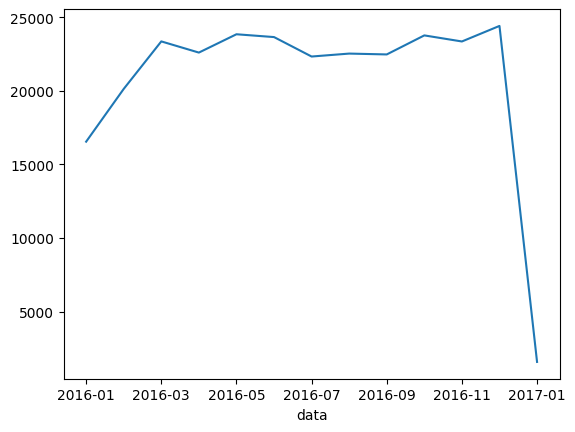

In [43]:
# Plotando um gráfico 
subset.plot() 